In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime as dt1

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [11]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
my_trip = calc_temps('2017-08-01', '2017-08-07')
TMIN = my_trip[0][0]
TAVE = my_trip[0][1]
TMAX = my_trip[0][2]

print(TMIN)
print(TAVE)
print(TMAX)



72.0
79.25
83.0


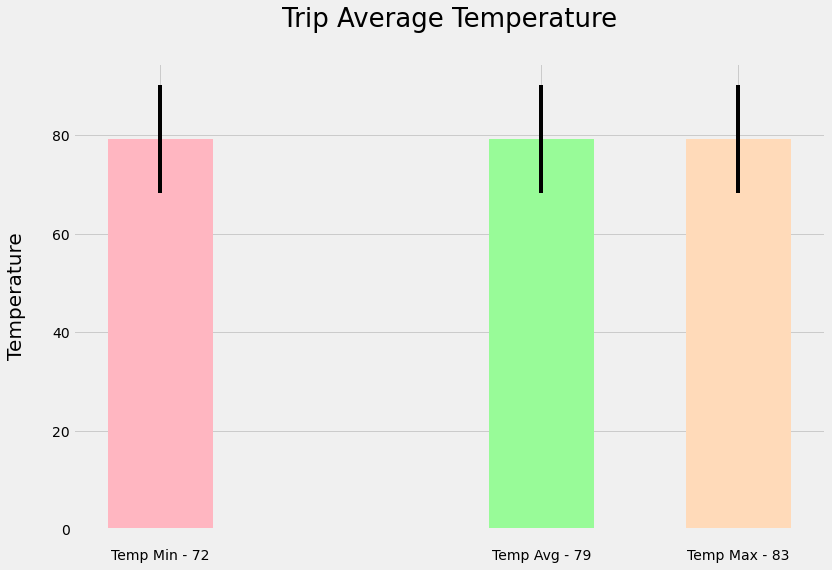

In [14]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(12,8))
plt.bar(my_trip[0],TAVE,width=2.0,yerr=(TMAX-TMIN),color=['lightpink','palegreen','peachpuff'])
plt.title('Trip Average Temperature\n',fontsize=26,color='black')
plt.xticks([72,79.25, 83],['\nTemp Min - 72','\nTemp Avg - 79','\nTemp Max - 83'])
plt.ylabel('Temperature\n',fontsize=20,color='black')

plt.show()

### Daily Rainfall Average

In [15]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_rainfall = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).\
filter(Station.station==Measurement.station).group_by(Station.station).\
order_by(func.sum(Measurement.prcp).desc()).all()

station_rainfall

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [16]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [17]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
# Strip off the year and save a list of strings in the format %m-%d
trip_dates = []
date_range = []
start_datetime = dt1.strptime(start_date,'%Y-%m-%d')
end_datetime = dt1.strptime(end_date,'%Y-%m-%d')
step = dt.timedelta(days=1)
while start_datetime<=end_datetime:
    trip_dates.append(start_datetime.strftime("%Y-%m-%d"))
    date_range.append(start_datetime.strftime("%m-%d"))
    start_datetime += step


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = []
temp_query = [daily_normals(z) for z in date_range]
for a in range(0,len(temp_query)):
    normals.append(list(temp_query[a][0]))
    
# Print Normals list
normals

[[67.0, 75.54, 83.0],
 [68.0, 75.60377358490567, 84.0],
 [70.0, 76.61111111111111, 85.0],
 [69.0, 76.71153846153847, 84.0],
 [69.0, 76.14814814814815, 82.0],
 [67.0, 76.25, 83.0],
 [71.0, 77.15686274509804, 83.0]]

In [18]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

norms_df = pd.DataFrame(normals, columns=['Temp Min','Temp Avg', 'Temp Max'])
norms_df['Dates'] = trip_dates
norms_df = norms_df.set_index('Dates')
norms_df

,Temp Min,Temp Avg,Temp Max
Dates,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


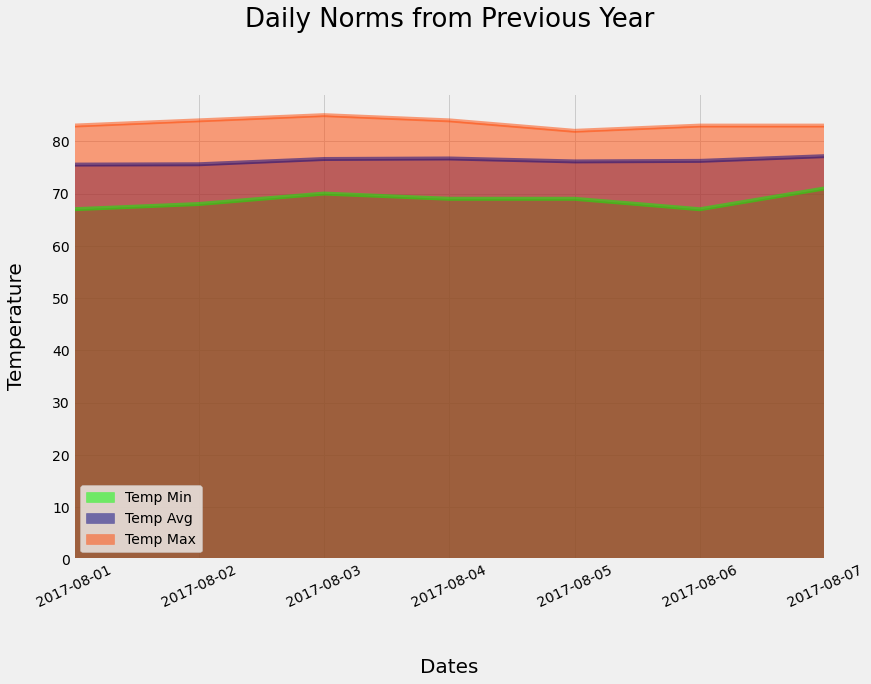

In [19]:
# Plot the daily normals as an area plot with `stacked=False`

area_plot = norms_df.plot(kind='area',figsize=(12,8),stacked=False,rot=25,color=['lime','navy','orangered'])
plt.title('Daily Norms from Previous Year\n\n',fontsize=26,color='black')
plt.xlabel('\n\nDates',fontsize=20,color='black')
plt.ylabel('Temperature\n',fontsize=20,color='black')
plt.xlim(0,6)
plt.show()

## Close Session

In [20]:
session.close()